# Installation

In this tutorial we show how to install OpenSBT and execute a dummy AEB system in a simplified simulator.

The installation has been tested with Ubuntu 22.04 and Python 3.8. It is recommend having installed git.

With git you need first to open a terminal in the folder where you want to install OpenSBT and clone the repository via (the "!" is only required if statement is executed in this jupyter notebook)


In [1]:
!git clone https://git.fortiss.org/opensbt/opensbt-core.git

Cloning into 'opensbt-core'...
remote: Enumerating objects: 1938, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 1938 (delta 62), reused 0 (delta 0), pack-reused 1820
Receiving objects: 100% (1938/1938), 93.22 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (1073/1073), done.


Now you need to go to the OpenSBT folder via:

In [3]:
cd opensbt-core


/home/sorokin/Projects/testing/search-based-test-case-generation/doc/jupyter/opensbt-core


Then install all dependencies of OpenSBT with the following command (installation might take some seconds, as libraries need to be downloaded):


In [4]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


## Testing Installation

We can now test the installation of OpenSBT by running our first experiment: Testing a simplified Automated Emergency Braking system in avoiding a collision with a pedestrian. The experiment is already define in OpenSBT and has the name "5". Note, that this is a very simplified system and is only for explaining the usage of OpenSBT.

_Note: Only linear motion planning, no comprehensive vehicles dynamics or environmental simulation is used. This system is just for testing the installation of OpenSBT._

In [5]:
!python run.py -e 5

2023-10-15 21:30:09,323 INFO     Logging setup. Writing to file:  ./log.txt
2023-10-15 21:30:09,325 INFO     Selected experiment: 5
2023-10-15 21:30:09,325 INFO     Pymoo NSGA-II algorithm is used.
2023-10-15 21:30:09,327 INFO     Running evaluation number 1
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       20 |      3 |             - |             -
2023-10-15 21:30:09,374 INFO     Running evaluation number 2
     2 |       40 |      3 |  0.0147334400 |         ideal
2023-10-15 21:30:09,423 INFO     Running evaluation number 3
     3 |       60 |      3 |  0.3295830139 |         nadir
2023-10-15 21:30:09,480 INFO     Running evaluation number 4
     4 |       80 |      4 |  0.1043200389 |             f
2023-10-15 21:30:09,538 INFO     Running evaluation number 5
     5 |      100 |      7 |  0.0244969035 |             f
2023-10-15 21:30:09,641 INFO     Running evaluation number 6
     6 |      120 |      5 |  1.1555596553 |         nadir
2023-10-15 21:30:09,696

We can now inspect the created result artefacts which are located in the results folder whose path is written in the bottom of the output. We load them in the jupyter notebook:

In [3]:
import pandas as pd
import os
exp_folders = os.listdir(os.getcwd() + "/results/DummySimulatorProblem/NSGA2/")
results_path = os.getcwd() + f"/results/DummySimulatorProblem/NSGA2/{exp_folders[0]}"
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

    Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0       0        43.885073      2.415600       292.547288      1.259837   
1       1        43.905185      2.414763       292.489849      1.228269   
2       2        43.883717      2.411500       291.106331      1.293420   
3       3        43.885073      2.415600       292.547288      1.259837   
4       4        43.905185      2.414763       292.489849      1.228269   
5       5        43.883717      2.411500       291.106331      1.293420   
6       6        43.885073      2.415600       292.547288      1.259837   
7       7        43.905185      2.414763       292.489849      1.228269   
8       8        43.426318      2.360157       291.106155      1.291262   
9       9        43.883717      2.411500       291.106331      1.293420   
10     10        43.885073      2.415600       292.547288      1.259837   
11     11        43.905185      2.414763       292.489849      1.228269   
12     12        43.42011

In [7]:
import pandas as pd
import os
df = pd.read_csv(f'{results_path}/all_critical_testcases.csv')
print(df)

    Index  orientation_ego  velocity_ego  orientation_ped  velocity_ped  \
0       0        43.885073      2.415600       292.547288      1.259837   
1       1        43.905185      2.414763       292.489849      1.228269   
2       2        43.883717      2.411500       291.106331      1.293420   
3       3        43.885073      2.415600       292.547288      1.259837   
4       4        43.905185      2.414763       292.489849      1.228269   
5       5        43.883717      2.411500       291.106331      1.293420   
6       6        43.885073      2.415600       292.547288      1.259837   
7       7        43.905185      2.414763       292.489849      1.228269   
8       8        43.426318      2.360157       291.106155      1.291262   
9       9        43.883717      2.411500       291.106331      1.293420   
10     10        43.885073      2.415600       292.547288      1.259837   
11     11        43.905185      2.414763       292.489849      1.228269   
12     12        43.42011

Further, we can inspect the visualization of the scenarios (yellow: ego vehicle, red: pedestrian)  

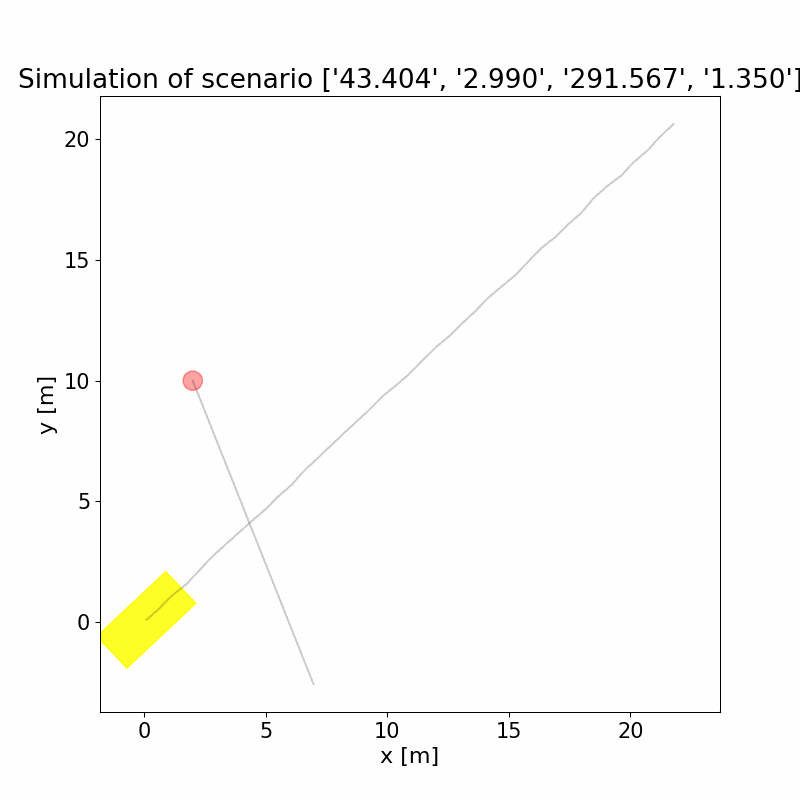

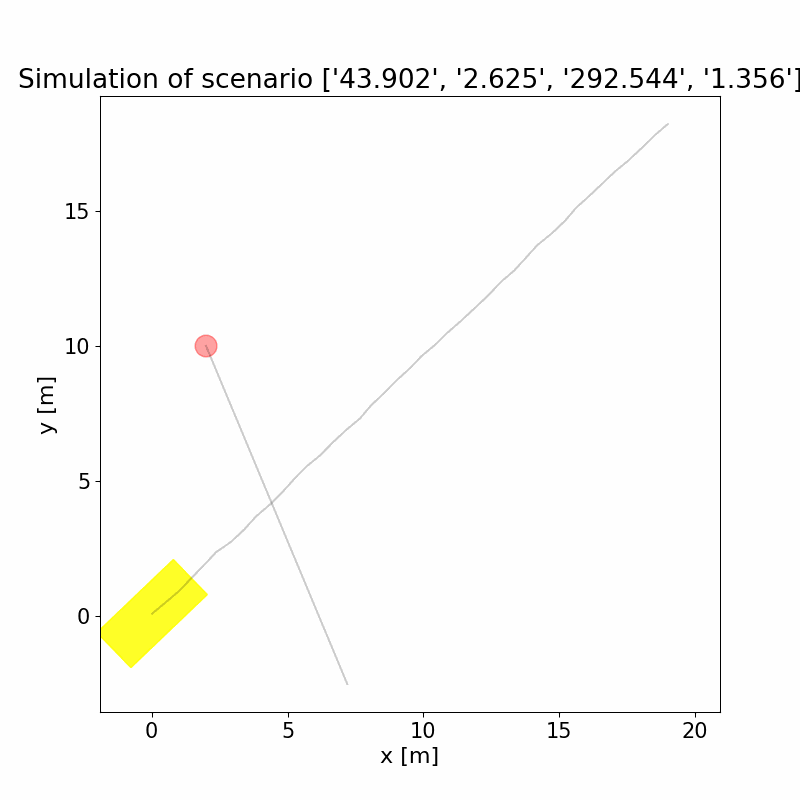

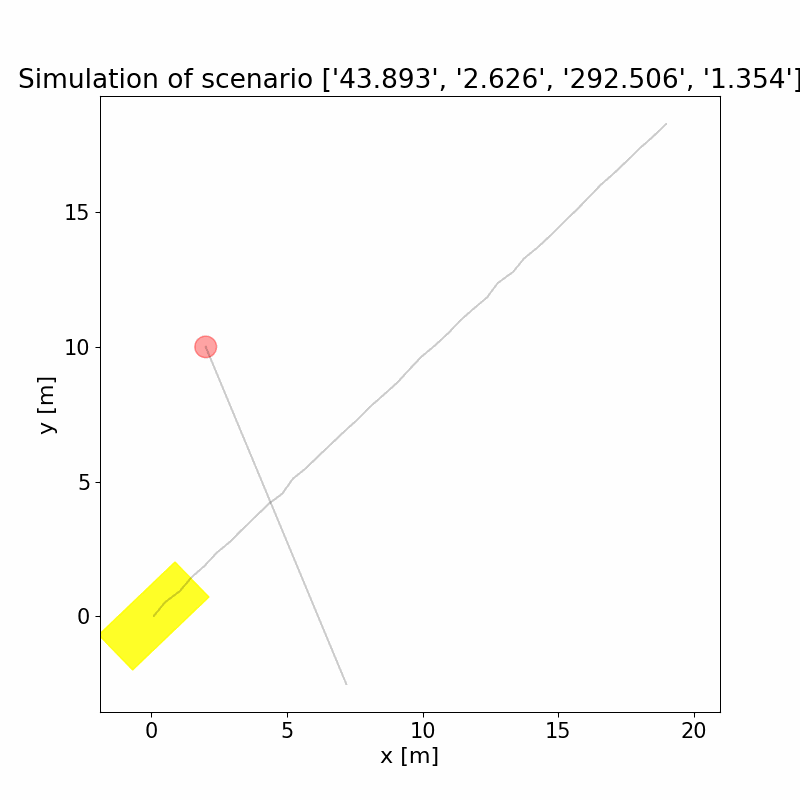

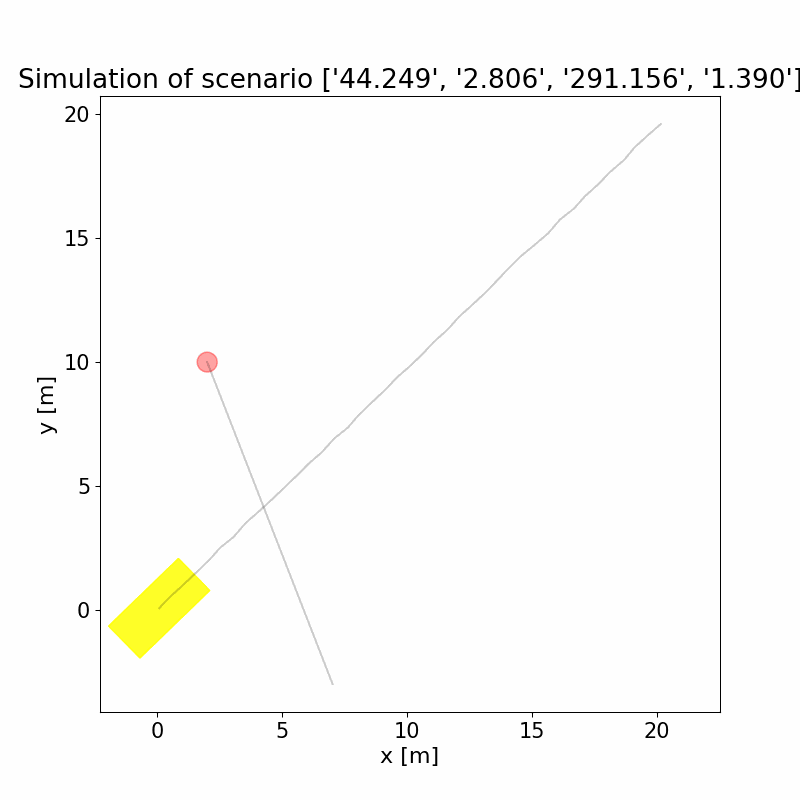

In [4]:
from IPython.display import Image
import os
n = 4 # show max n images
folder_gifs = results_path + os.sep + "gif"
i = 0
for f in os.listdir(folder_gifs):
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and i < n:
      img = Image(open(fpath,'rb').read(), width=300, height=300)
      display(img)
      i = i+1

Also we can inspect pair-wise test input space plots which are generated for all test cases encountered during search. Purple boxes depict intervals in the search space where the SUT is assumed to be critical. These regions are identified by Decision Tree learning. 
    

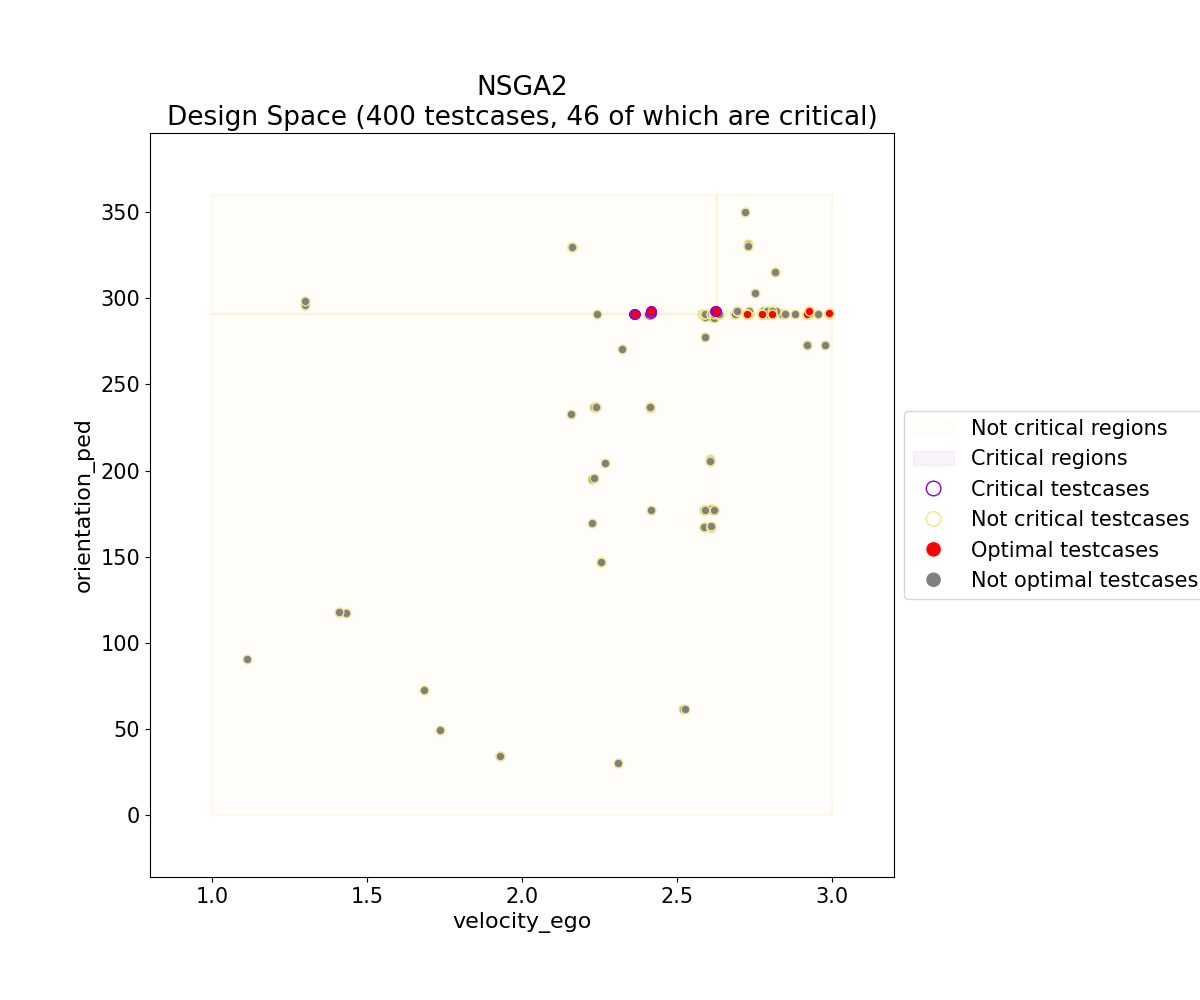

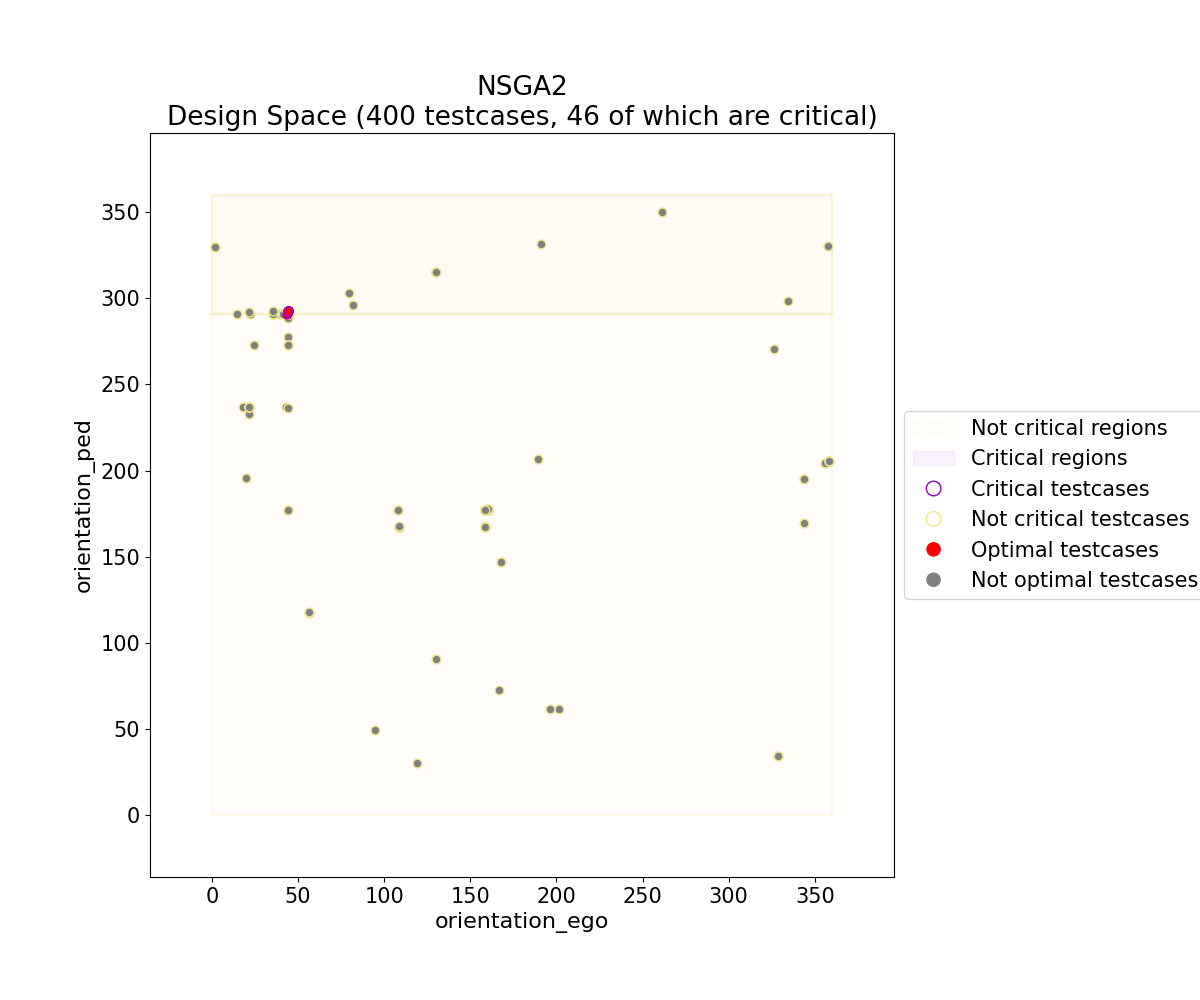

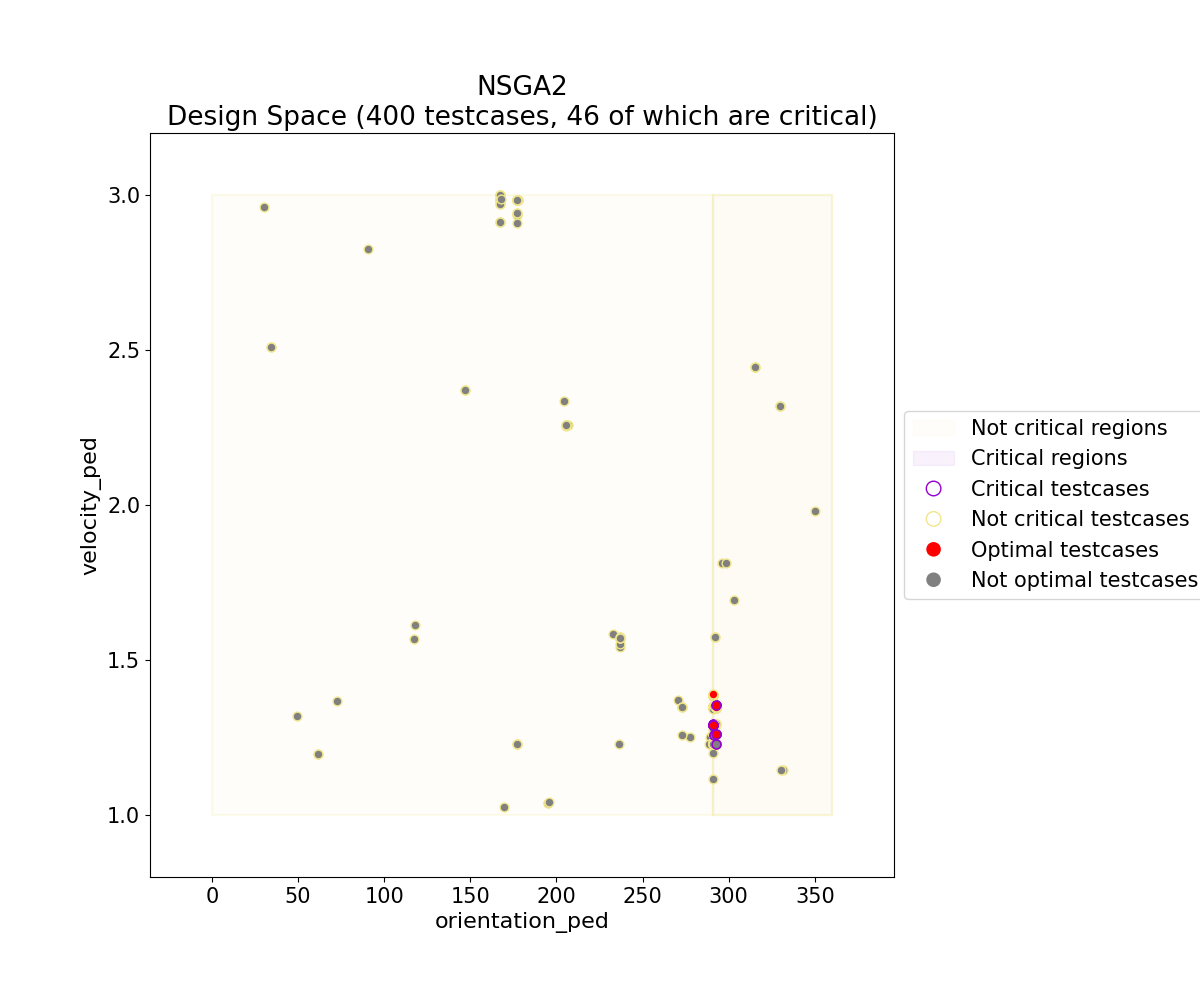

In [9]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "design_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1

Also plots are generated visualizing fitness values of all evaluated test inputs:


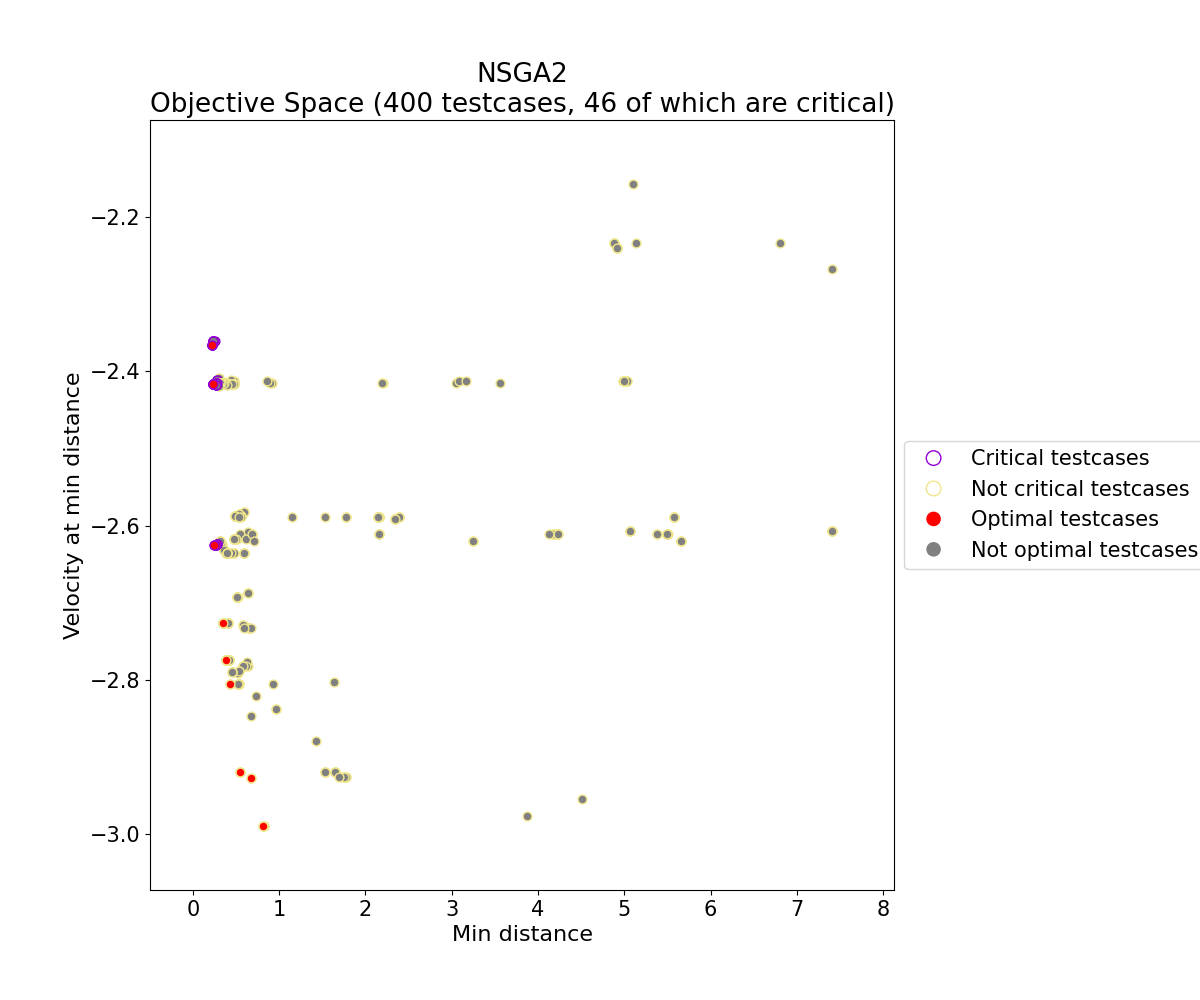

In [10]:
from IPython.display import Image
import os
n = 3 # show max n images
folder_gifs = results_path + os.sep + "objective_space"
i = 0
for f in os.listdir(folder_gifs):
    # checking if it is a file
    fpath = folder_gifs + os.sep + f
    if os.path.isfile(fpath) and os.path.splitext(fpath)[1] == '.png' and  i < n:
      img = Image(filename=fpath, width=500, height=500)
      display(img)
      i = i+1    

**Note: In the fitness space plot the velocity is negative as the corresponding fitness functions are inverted and minimized internally by pymoo.**